# Plots on how Results depend on AF

In [3]:
import numpy as np
import pandas as pd
import os
import sys as sys
import socket
import matplotlib.pyplot as plt
import multiprocessing as mp
import itertools as it
import pandas as pd
import h5py
#from adjustText import adjust_text

import warnings
warnings.filterwarnings("ignore") # Great Style
socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("No compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

compute-e-16-237.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK
CPU Count: 28


## 1) Plot AF Scatter

In [4]:
%%time
# 7s for 1000 indivdiuals.
# 2min52s for 33967 indivdiuals
version="54.1"
folder_in =  f"/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v{version}/ch" # for hdf5
ch=3

with h5py.File(f"{folder_in}{ch}.h5", "r") as f: # Load for Sanity Check. See below!
    print(list(f))
    print(list(f["calldata"]))
    print(list(f["variants"]))
    af_all = f["variants/AF_ALL"][:]
    af= f["variants/AF"][:,0]
    raf= f["variants/RAF"][:,0]

['calldata', 'samples', 'variants']
['AD', 'DS', 'GP', 'GT', 'HS', 'PL']
['AF', 'AF_ALL', 'ALT', 'BUF', 'CHROM', 'FILTER_PASS', 'ID', 'INFO', 'MAP', 'POS', 'QUAL', 'RAF', 'REF', 'altlen', 'is_snp', 'numalt']
CPU times: user 24 ms, sys: 6.2 ms, total: 30.2 ms
Wall time: 71.5 ms


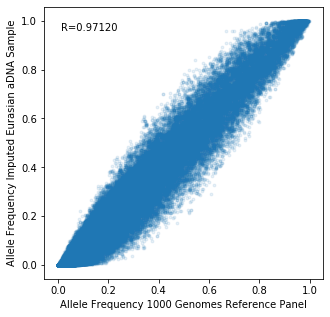

In [6]:
plt.figure(figsize=(5,5))
ax = plt.gca()
ax.scatter(raf, af_all, alpha=0.1, s=8)
ax.set_xlabel("Allele Frequency 1000 Genomes Reference Panel")
ax.set_ylabel("Allele Frequency Imputed Eurasian aDNA Sample")

c = np.corrcoef(raf, af_all)[0,1]
t = f"R={c:.5f}"
ax.text(0.01,0.99,t, va="top", ha="left")
plt.show()

### Plot 2) How to IBD calls correlate

In [6]:
%%time

df_ibds = pd.read_csv("/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.ind.v54.1b.tsv", 
                      sep="\t") 

df_ibds2 = pd.read_csv("/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.ind.v54.1c.tsv", 
                      sep="\t") 

dft = pd.merge(df_ibds, df_ibds2, on=["iid1","iid2"])
print(f"Merged from {len(df_ibds)} and {len(df_ibds2)} to {len(dft)}")

Merged from 514325 and 562966 to 501745
CPU times: user 1.51 s, sys: 362 ms, total: 1.87 s
Wall time: 1.91 s


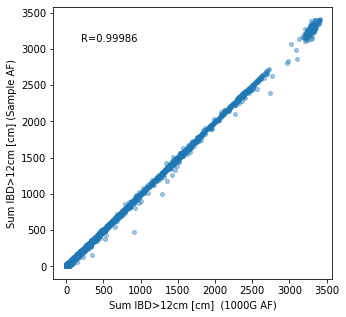

In [23]:
plt.figure(figsize=(5,5))
ax = plt.gca()
x,y=dft["sum_IBD>12_y"], dft["sum_IBD>12_x"]
ax.scatter(x,y, alpha=0.4, s=16)
ax.set_xlabel("Sum IBD>12cm [cm]  (1000G AF)")
ax.set_ylabel("Sum IBD>12cm [cm] (Sample AF)")

c = np.corrcoef(x, y)[0,1]
t = f"R={c:.5f}"
ax.text(0.1 ,0.9,t, va="top", ha="left",transform = ax.transAxes)

plt.show()

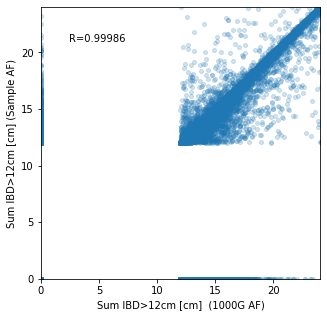

In [26]:
plt.figure(figsize=(5,5))
ax = plt.gca()
x,y=dft["sum_IBD>12_y"], dft["sum_IBD>12_x"]
ax.scatter(x,y, alpha=0.2, s=16)
ax.set_xlabel("Sum IBD>12cm [cm]  (1000G AF)")
ax.set_ylabel("Sum IBD>12cm [cm] (Sample AF)")

c = np.corrcoef(x, y)[0,1]
t = f"R={c:.5f}"
ax.text(0.1 ,0.9,t, va="top", ha="left",transform = ax.transAxes)

ax.set_xlim([0,24])
ax.set_ylim([0,24])
plt.show()

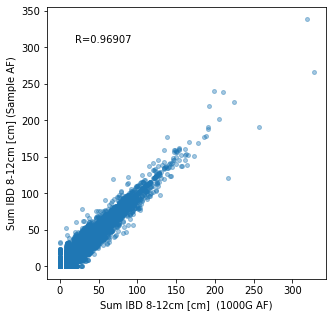

In [27]:
plt.figure(figsize=(5,5))
ax = plt.gca()
x,y=dft["sum_IBD>8_y"] - dft["sum_IBD>12_y"], dft["sum_IBD>8_x"] - dft["sum_IBD>12_x"]
ax.scatter(x,y, alpha=0.4, s=16)
ax.set_xlabel("Sum IBD 8-12cm [cm]  (1000G AF)")
ax.set_ylabel("Sum IBD 8-12cm [cm] (Sample AF)")

c = np.corrcoef(x, y)[0,1]
t = f"R={c:.5f}"
ax.text(0.1 ,0.9,t, va="top", ha="left",transform = ax.transAxes)

plt.show()

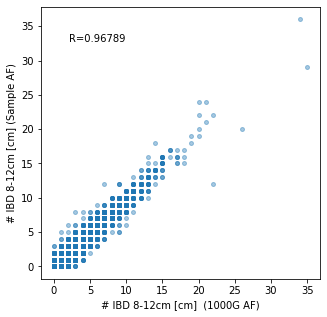

In [28]:
plt.figure(figsize=(5,5))
ax = plt.gca()
x,y=dft["n_IBD>8_y"] - dft["n_IBD>12_y"], dft["n_IBD>8_x"] - dft["n_IBD>12_x"]
ax.scatter(x,y, alpha=0.4, s=16)
ax.set_xlabel("# IBD 8-12cm [cm]  (1000G AF)")
ax.set_ylabel("# IBD 8-12cm [cm] (Sample AF)")

c = np.corrcoef(x, y)[0,1]
t = f"R={c:.5f}"
ax.text(0.1 ,0.9,t, va="top", ha="left",transform = ax.transAxes)

plt.show()

### Make Plot for Supplement of Paper

Saved to ./figs/scatter/af_scatters.png


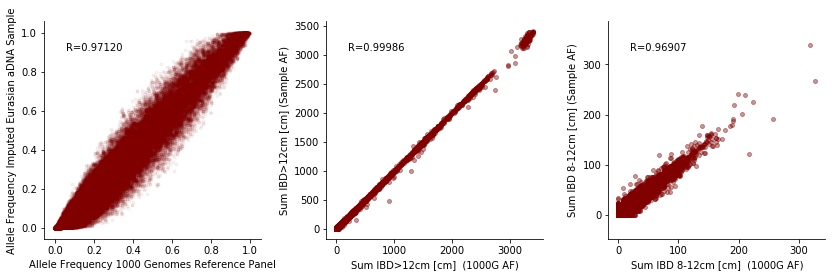

In [8]:
savepath = "./figs/scatter/af_scatters.png"

fig = plt.figure(figsize=(14,4))
gs = fig.add_gridspec(nrows=1, ncols=3, wspace=0.3)

ax = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])

### AF Scatter
ax.scatter(raf, af_all, alpha=0.05, s=8, c="maroon")
ax.set_xlabel("Allele Frequency 1000 Genomes Reference Panel")
ax.set_ylabel("Allele Frequency Imputed Eurasian aDNA Sample")

c = np.corrcoef(raf, af_all)[0,1]
t = f"R={c:.5f}"
ax.text(0.1,0.9,t, va="top", ha="left", transform = ax.transAxes)

### sum IBD>12cm
x,y=dft["sum_IBD>12_y"], dft["sum_IBD>12_x"]
ax1.scatter(x,y, alpha=0.4, s=16, c="maroon")
ax2.set_yticks([0,1000,2000,3000])
ax1.set_xlabel("Sum IBD>12cm [cm]  (1000G AF)")
ax1.set_ylabel("Sum IBD>12cm [cm] (Sample AF)")

c = np.corrcoef(x, y)[0,1]
t = f"R={c:.5f}"
ax1.text(0.1 ,0.9,t, va="top", ha="left",transform = ax1.transAxes)


### sum IBD 8-12cm
x,y=dft["sum_IBD>8_y"] - dft["sum_IBD>12_y"], dft["sum_IBD>8_x"] - dft["sum_IBD>12_x"]
ax2.scatter(x,y, alpha=0.4, s=16, c="maroon")
ax2.set_yticks([0,100,200,300])
ax2.set_xlabel("Sum IBD 8-12cm [cm]  (1000G AF)")
ax2.set_ylabel("Sum IBD 8-12cm [cm] (Sample AF)")

c = np.corrcoef(x, y)[0,1]
t = f"R={c:.5f}"
ax2.text(0.1 ,0.9,t, va="top", ha="left",transform = ax2.transAxes)

for ax in [ax, ax1, ax2]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

if len(savepath)>0:
    plt.savefig(savepath, bbox_inches ='tight', pad_inches = 0, dpi=500)
    print(f"Saved to {savepath}")

plt.show()